In [26]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

print('Data source import complete.')


Data source import complete.


##  Data Exploration

In [27]:
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')


In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [29]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [32]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [33]:
y.value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


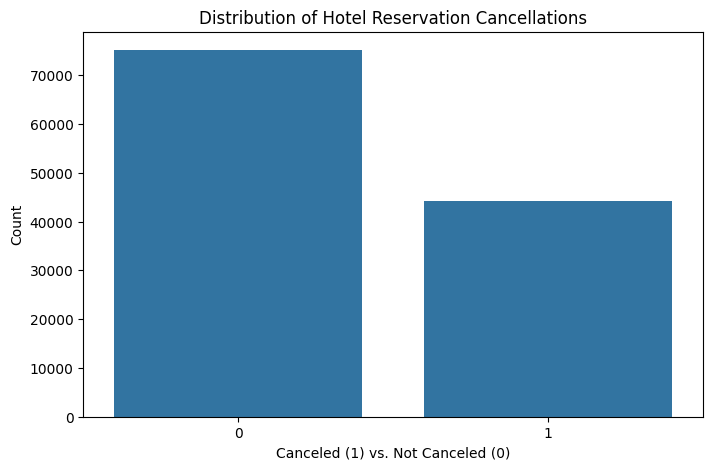

In [39]:
# Check distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribution of Hotel Reservation Cancellations')
plt.xlabel('Canceled (1) vs. Not Canceled (0)')
plt.ylabel('Count')
plt.show()


##  Data Preprocessing

In [40]:
# Fill missing values
X['agent'].fillna(-1, inplace=True)
X['company'].fillna(-1, inplace=True)
X['children'].fillna(0, inplace=True)  # Assuming missing values mean 0 children


<ipython-input-40-f47d583efee6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['agent'].fillna(-1, inplace=True)
<ipython-input-40-f47d583efee6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [41]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [42]:
numeric_features

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [43]:
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [44]:
# reservation_status and reservation_status_date might leak information about cancellation
X = X.drop(['reservation_status', 'reservation_status_date'], axis=1, errors='ignore')

In [45]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (83573, 29), (83573,)
Validation set: (17908, 29), (17908,)
Test set: (17909, 29), (17909,)


In [46]:
# Update feature lists after potential drops
numeric_features = [col for col in numeric_features if col in X.columns]
categorical_features = [col for col in categorical_features if col in X.columns]

In [47]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


In [49]:
 #Check processed data shape
print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed validation data shape: {X_val_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")

Processed training data shape: (83573, 249)
Processed validation data shape: (17908, 249)
Processed test data shape: (17909, 249)


In [51]:
# Check target distribution
y_train.value_counts(normalize=True)

,proportion
is_canceled,
0,0.630443
1,0.369557


## Adding helper functions

In [53]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [54]:
# Helper function for model evaluation
def evaluate_model(model, X, y, name="Model"):
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Canceled', 'Canceled'],
                yticklabels=['Not Canceled', 'Canceled'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    return acc, prec, rec, f1

In [55]:
# Helper function for plotting training history
def plot_history(history, title='Model Training History'):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


##  Building a Baseline Model

In [56]:
# Build baseline model
input_dim = X_train_processed.shape[1]

baseline_model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Baseline Model Summary:")
baseline_model.summary()

Baseline Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train baseline model
baseline_history = baseline_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=20,
    batch_size=256,
    verbose=1
)

Epoch 1/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7511 - loss: 0.4844 - val_accuracy: 0.8419 - val_loss: 0.3360
Epoch 2/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8424 - loss: 0.3330 - val_accuracy: 0.8514 - val_loss: 0.3146
Epoch 3/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.3123 - val_accuracy: 0.8544 - val_loss: 0.3062
Epoch 4/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3015 - val_accuracy: 0.8563 - val_loss: 0.3018
Epoch 5/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8626 - loss: 0.2945 - val_accuracy: 0.8579 - val_loss: 0.2989
Epoch 6/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8652 - loss: 0.2890 - val_accuracy: 0.8597 - val_loss: 0.2969
Epoch 7/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8681 - loss: 0.2843 - val_accuracy: 0.8612 - val_loss: 0.2949
Epoch 8/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8699 - loss: 0.2801 - val_accuracy: 0.

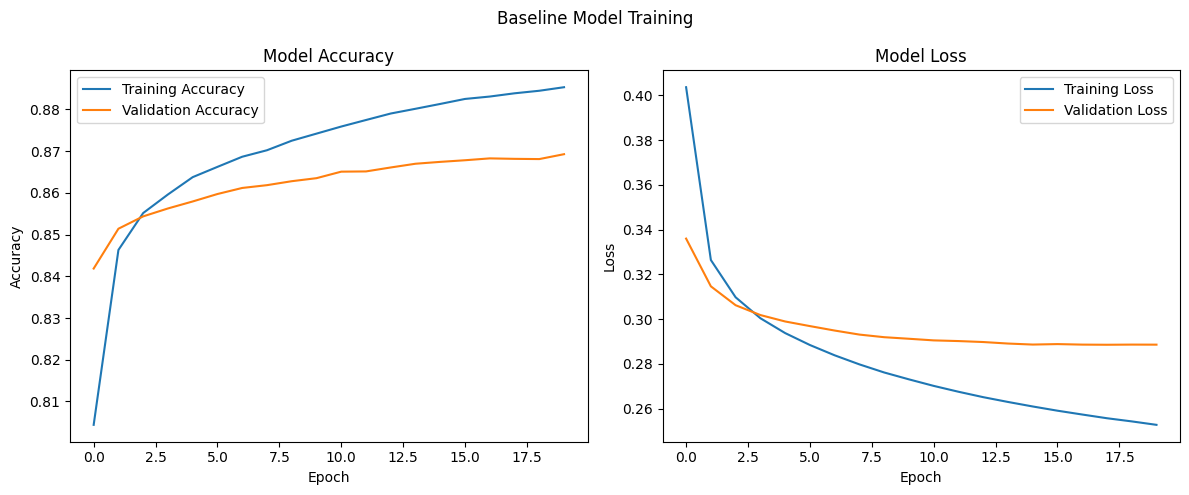

In [58]:
plot_history(baseline_history, title='Baseline Model Training')

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Baseline Model (Validation) Evaluation:
Accuracy: 0.8693
Precision: 0.8620
Recall: 0.7749
F1 Score: 0.8161


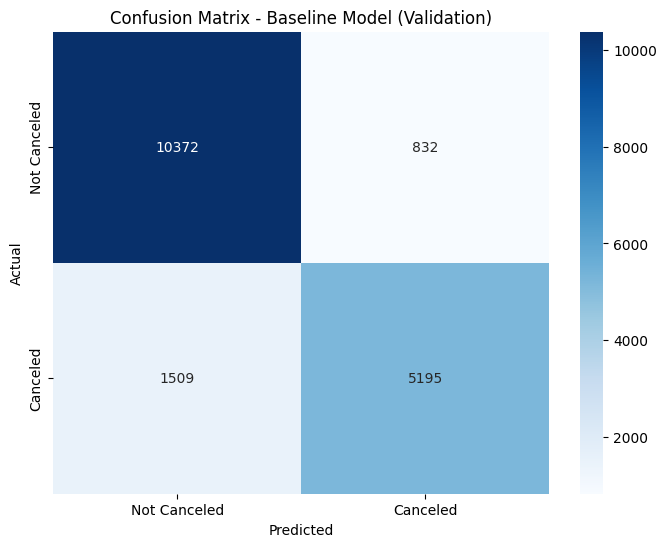


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11204
           1       0.86      0.77      0.82      6704

    accuracy                           0.87     17908
   macro avg       0.87      0.85      0.86     17908
weighted avg       0.87      0.87      0.87     17908



In [59]:
# Evaluate on validation set
baseline_metrics_val = evaluate_model(baseline_model, X_val_processed, y_val, name="Baseline Model (Validation)")

## Creating Underfit Model

In [60]:
# Create an intentionally underfit model
underfit_model = Sequential([
    Dense(8, activation='relu', input_dim=input_dim),  # Very small layer
    Dense(1, activation='sigmoid')
])

underfit_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Underfit Model Summary:")
underfit_model.summary()

Underfit Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,009 (7.85 KB)

 Trainable params: 2,009 (7.85 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
underfit_history = underfit_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=5,  # Few epochs
    batch_size=256,
    verbose=1
)

Epoch 1/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6873 - loss: 0.5771 - val_accuracy: 0.8164 - val_loss: 0.3926
Epoch 2/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8176 - loss: 0.3872 - val_accuracy: 0.8222 - val_loss: 0.3697
Epoch 3/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8242 - loss: 0.3685 - val_accuracy: 0.8263 - val_loss: 0.3582
Epoch 4/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8278 - loss: 0.3575 - val_accuracy: 0.8316 - val_loss: 0.3490
Epoch 5/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8321 - loss: 0.3487 - val_accuracy: 0.8366 - val_loss: 0.3415


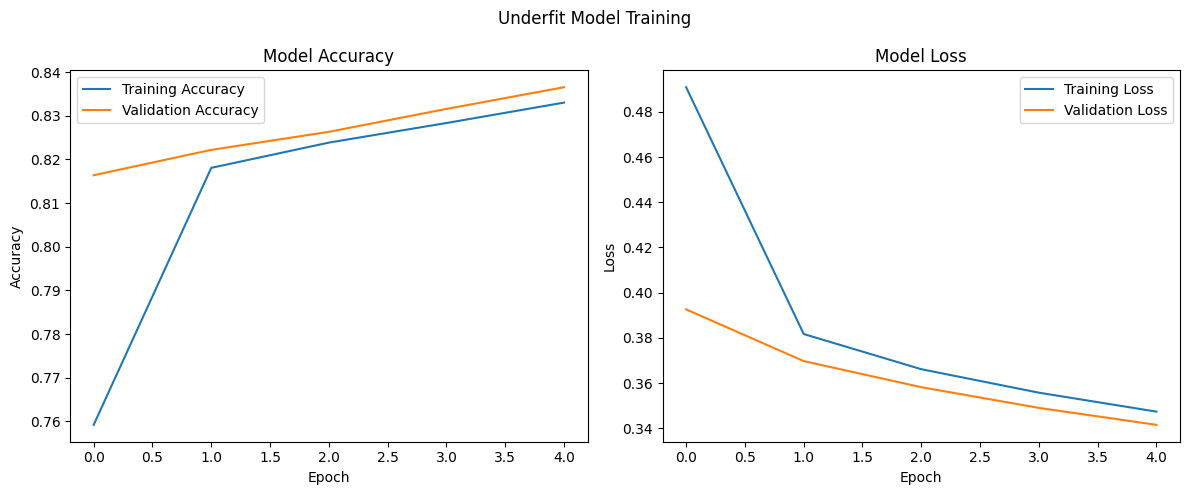

In [62]:
plot_history(underfit_history, title='Underfit Model Training')


560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

Underfit Model Evaluation:
Accuracy: 0.8366
Precision: 0.8334
Recall: 0.7042
F1 Score: 0.7634


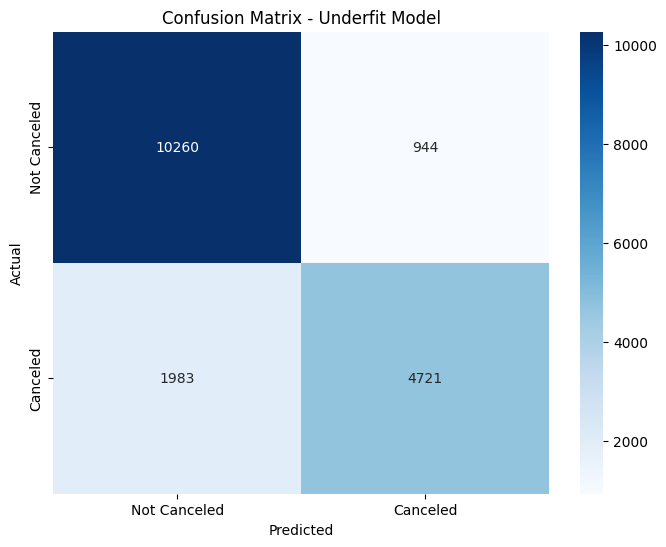


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11204
           1       0.83      0.70      0.76      6704

    accuracy                           0.84     17908
   macro avg       0.84      0.81      0.82     17908
weighted avg       0.84      0.84      0.83     17908



In [63]:
# Evaluate underfit model
underfit_metrics = evaluate_model(underfit_model, X_val_processed, y_val, name="Underfit Model")

## Fixing the Underfit Model

In [64]:
fixed_underfit_model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

fixed_underfit_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


fixed_underfit_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,273 (87.00 KB)

 Trainable params: 22,273 (87.00 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Train fixed model with more epochs
fixed_underfit_history = fixed_underfit_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=25,  # More epochs
    batch_size=256,
    verbose=1
)

Epoch 1/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7726 - loss: 0.4544 - val_accuracy: 0.8474 - val_loss: 0.3258
Epoch 2/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8480 - loss: 0.3236 - val_accuracy: 0.8562 - val_loss: 0.3089
Epoch 3/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8563 - loss: 0.3050 - val_accuracy: 0.8604 - val_loss: 0.3013
Epoch 4/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8627 - loss: 0.2940 - val_accuracy: 0.8611 - val_loss: 0.2969
Epoch 5/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8659 - loss: 0.2856 - val_accuracy: 0.8632 - val_loss: 0.2943
Epoch 6/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8708 - loss: 0.2788 - val_accuracy: 0.8648 - val_loss: 0.2920
Epoch 7/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8748 - loss: 0.2732 - val_accuracy: 0.8662 - val_loss: 0.2896
Epoch 8/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8775 - loss: 0.2678 - val_accuracy: 0

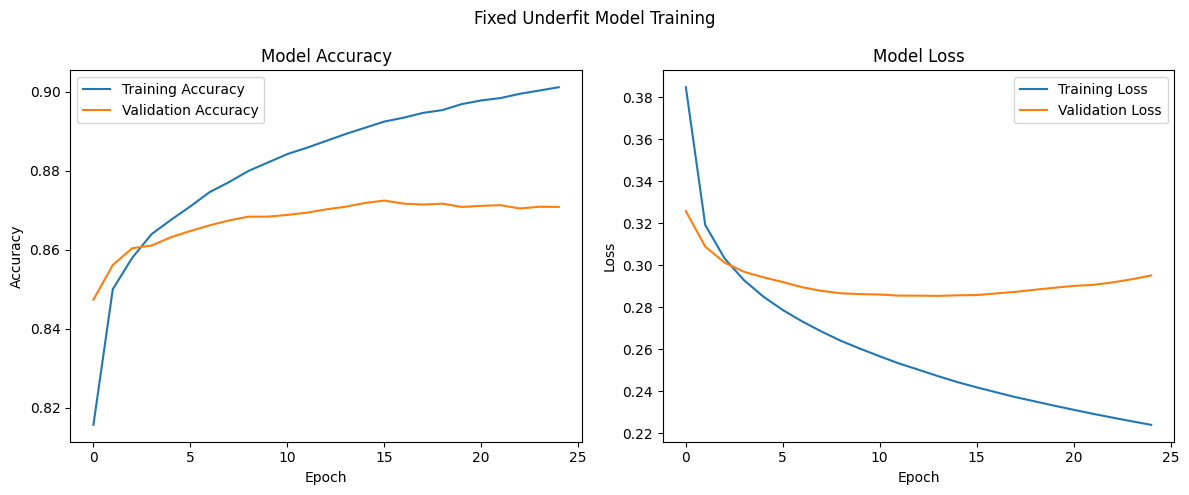

In [66]:
plot_history(fixed_underfit_history, title='Fixed Underfit Model Training')

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Fixed Underfit Model Evaluation:
Accuracy: 0.8708
Precision: 0.8503
Recall: 0.7949
F1 Score: 0.8217


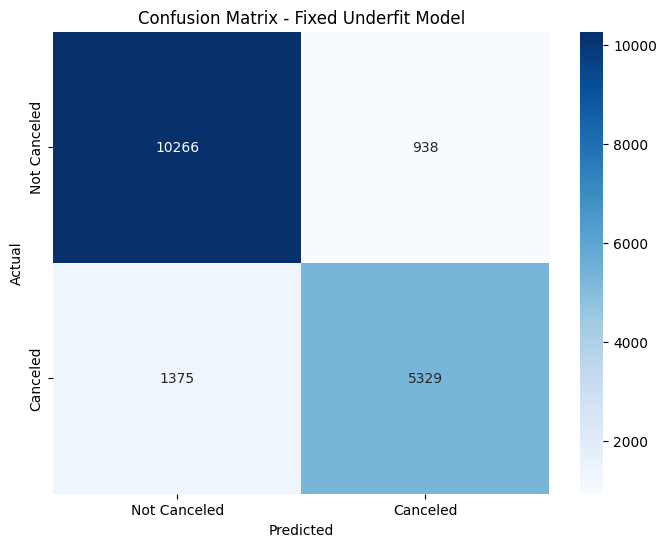


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11204
           1       0.85      0.79      0.82      6704

    accuracy                           0.87     17908
   macro avg       0.87      0.86      0.86     17908
weighted avg       0.87      0.87      0.87     17908



In [67]:
# Evaluate fixed model
fixed_underfit_metrics = evaluate_model(fixed_underfit_model, X_val_processed, y_val, name="Fixed Underfit Model")

##  Creating Overfit Model

In [68]:
overfit_model = Sequential([
    Dense(256, activation='relu', input_dim=input_dim),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

overfit_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

overfit_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,633 (1022.00 KB)

 Trainable params: 261,633 (1022.00 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train overfit model for many epochs
overfit_history = overfit_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=50,  # Many epochs to encourage overfitting
    batch_size=256,
    verbose=1
)

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8032 - loss: 0.4010 - val_accuracy: 0.8508 - val_loss: 0.3123
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8583 - loss: 0.3027 - val_accuracy: 0.8600 - val_loss: 0.2969
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8697 - loss: 0.2817 - val_accuracy: 0.8628 - val_loss: 0.2903
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8768 - loss: 0.2663 - val_accuracy: 0.8664 - val_loss: 0.2874
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8844 - loss: 0.2522 - val_accuracy: 0.8664 - val_loss: 0.2896
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8895 - loss: 0.2405 - val_accuracy: 0.8670 - val_loss: 0.2961
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8960 - loss: 0.2292 - val_accuracy: 0.8670 - val_loss: 0.3053
Epoch 8/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9020 - loss: 0.2182 - val_acc

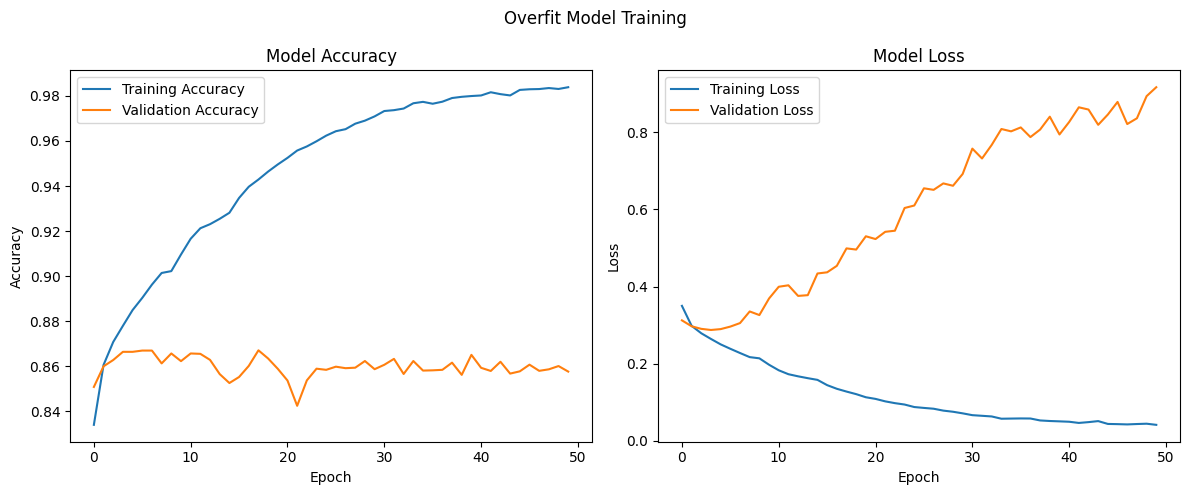

In [70]:
plot_history(overfit_history, title='Overfit Model Training')

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Overfit Model Evaluation:
Accuracy: 0.8577
Precision: 0.7968
Recall: 0.8319
F1 Score: 0.8140


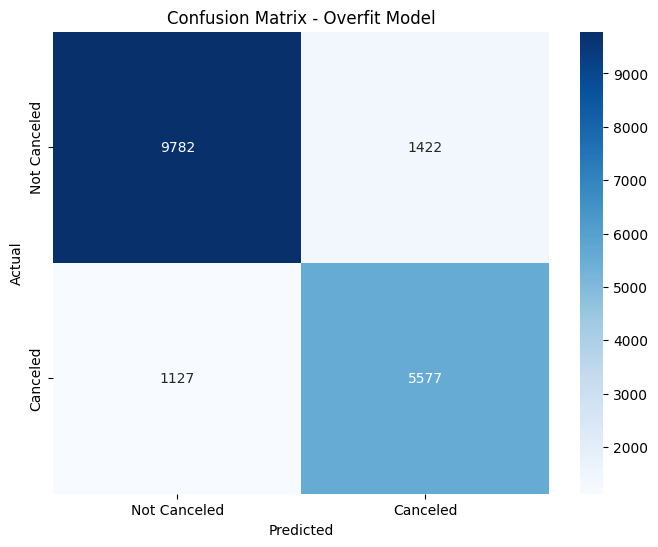


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     11204
           1       0.80      0.83      0.81      6704

    accuracy                           0.86     17908
   macro avg       0.85      0.85      0.85     17908
weighted avg       0.86      0.86      0.86     17908



In [71]:
overfit_metrics = evaluate_model(overfit_model, X_val_processed, y_val, name="Overfit Model")

## Fixing overfitting by reducing Model Complexity

In [72]:
simple_model = Sequential([
    Dense(32, activation='relu', input_dim=input_dim),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

simple_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

simple_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 32)             │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
simple_history = simple_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7406 - loss: 0.5013 - val_accuracy: 0.8339 - val_loss: 0.3521
Epoch 2/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8340 - loss: 0.3478 - val_accuracy: 0.8497 - val_loss: 0.3282
Epoch 3/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8458 - loss: 0.3270 - val_accuracy: 0.8520 - val_loss: 0.3180
Epoch 4/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8522 - loss: 0.3163 - val_accuracy: 0.8543 - val_loss: 0.3117
Epoch 5/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.3092 - val_accuracy: 0.8572 - val_loss: 0.3070
Epoch 6/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3039 - val_accuracy: 0.8588 - val_loss: 0.3033
Epoch 7/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8596 - loss: 0.2997 - val_accuracy: 0.8600 - val_loss: 0.3005
Epoch 8/50
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8614 - loss: 0.2965 - val_accuracy: 0.

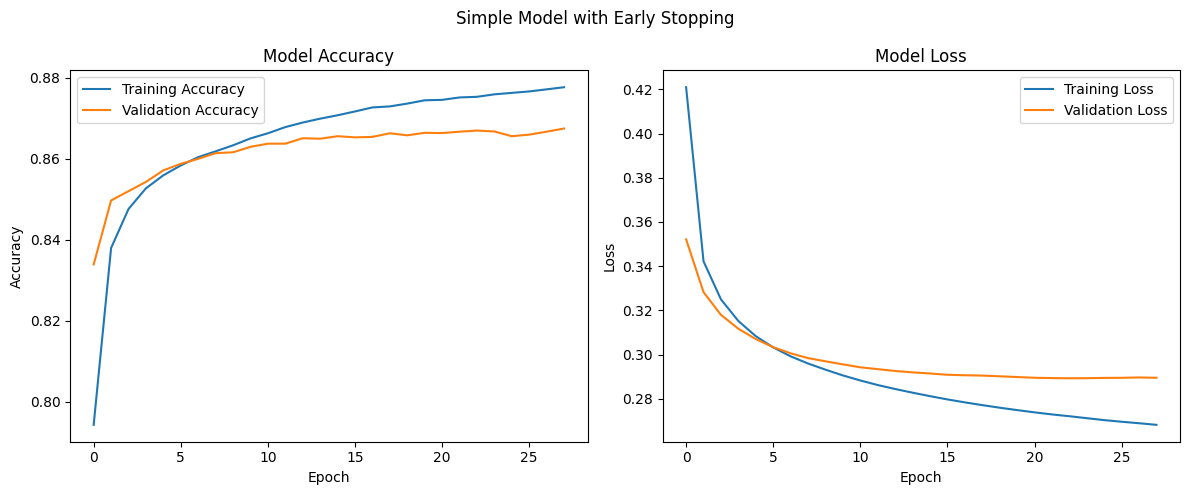

In [74]:
plot_history(simple_history, title='Simple Model with Early Stopping')

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Simple Model Evaluation:
Accuracy: 0.8670
Precision: 0.8495
Recall: 0.7836
F1 Score: 0.8152


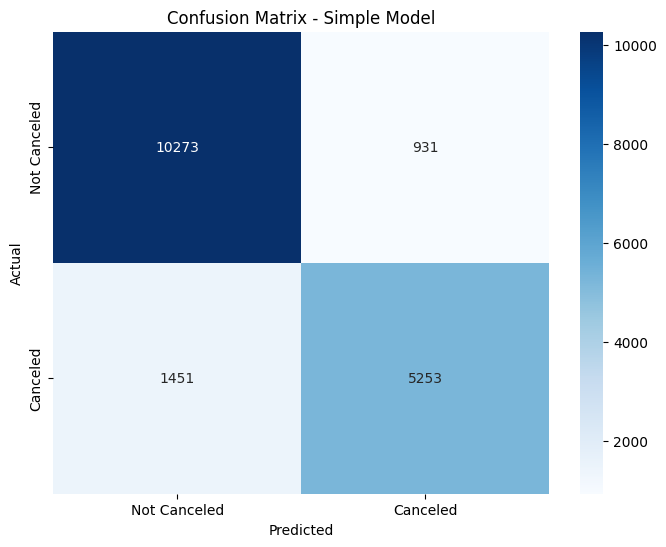


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11204
           1       0.85      0.78      0.82      6704

    accuracy                           0.87     17908
   macro avg       0.86      0.85      0.86     17908
weighted avg       0.87      0.87      0.87     17908



In [75]:
simple_metrics = evaluate_model(simple_model, X_val_processed, y_val, name="Simple Model")

##  Experimenting with Batch Normalization

In [76]:
batchnorm_model = Sequential([
    Dense(64, input_dim=input_dim),  # No activation here
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),  # Activation after BatchNorm

    Dense(32),  # No activation
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    Dense(1, activation='sigmoid')
])

batchnorm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

batchnorm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 192 (768.00 B)

In [77]:
batchnorm_history = batchnorm_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=20,
    batch_size=256,
    verbose=1
)

Epoch 1/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7519 - loss: 0.4794 - val_accuracy: 0.8422 - val_loss: 0.3380
Epoch 2/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8475 - loss: 0.3280 - val_accuracy: 0.8527 - val_loss: 0.3105
Epoch 3/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8573 - loss: 0.3073 - val_accuracy: 0.8577 - val_loss: 0.3017
Epoch 4/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8634 - loss: 0.2957 - val_accuracy: 0.8615 - val_loss: 0.2962
Epoch 5/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8680 - loss: 0.2870 - val_accuracy: 0.8628 - val_loss: 0.2931
Epoch 6/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8706 - loss: 0.2802 - val_accuracy: 0.8636 - val_loss: 0.2911
Epoch 7/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8743 - loss: 0.2745 - val_accuracy: 0.8654 - val_loss: 0.2899
Epoch 8/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8772 - loss: 0.2698 - val_accuracy: 0.

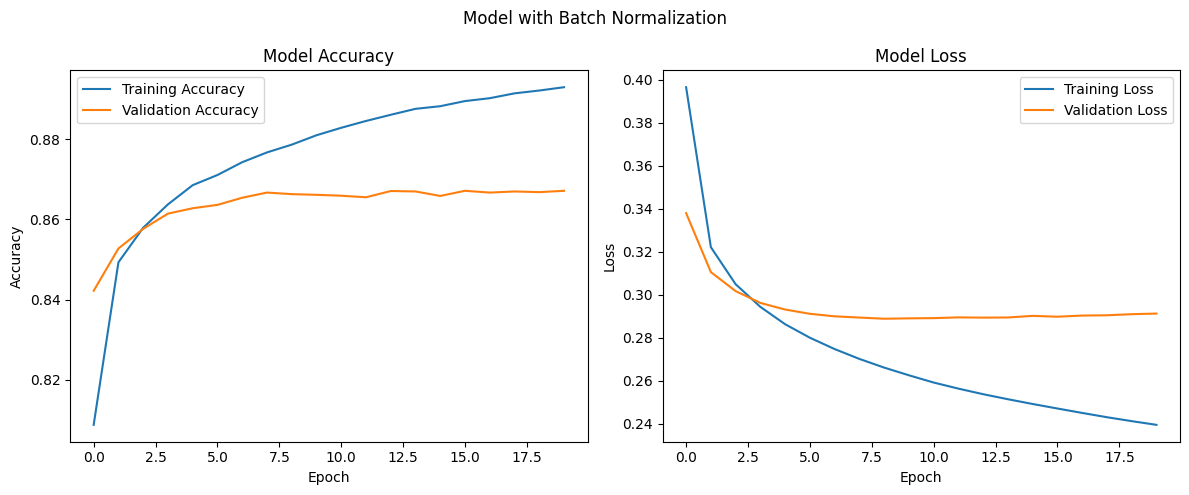

In [78]:
plot_history(batchnorm_history, title='Model with Batch Normalization')

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Batch Normalization Model Evaluation:
Accuracy: 0.8672
Precision: 0.8363
Recall: 0.8022
F1 Score: 0.8189


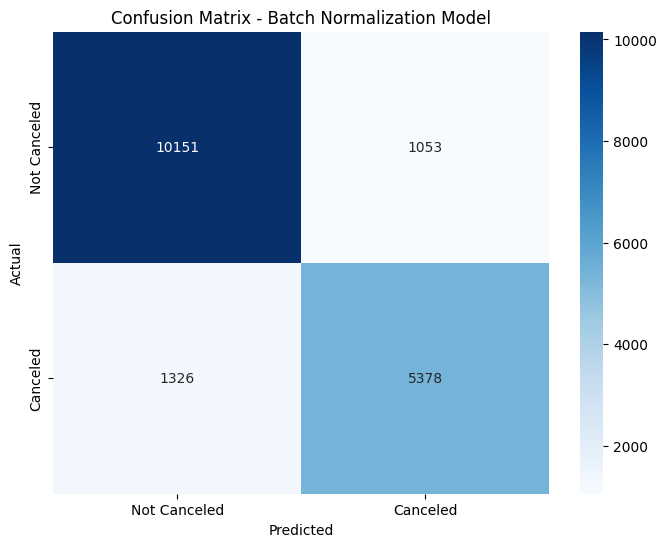


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11204
           1       0.84      0.80      0.82      6704

    accuracy                           0.87     17908
   macro avg       0.86      0.85      0.86     17908
weighted avg       0.87      0.87      0.87     17908



In [79]:
batchnorm_metrics = evaluate_model(batchnorm_model, X_val_processed, y_val, name="Batch Normalization Model")

## Comparing Models With and Without Batch Normalization

In [80]:
# Create a similar model without batch normalization for comparison
nobatchnorm_model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nobatchnorm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
# Train model without batch normalization
nobatchnorm_history = nobatchnorm_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=20,
    batch_size=256,
    verbose=1
)


Epoch 1/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7499 - loss: 0.4893 - val_accuracy: 0.8402 - val_loss: 0.3396
Epoch 2/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8412 - loss: 0.3366 - val_accuracy: 0.8521 - val_loss: 0.3155
Epoch 3/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8534 - loss: 0.3147 - val_accuracy: 0.8568 - val_loss: 0.3063
Epoch 4/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8577 - loss: 0.3032 - val_accuracy: 0.8592 - val_loss: 0.3013
Epoch 5/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8608 - loss: 0.2953 - val_accuracy: 0.8600 - val_loss: 0.2978
Epoch 6/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8651 - loss: 0.2891 - val_accuracy: 0.8621 - val_loss: 0.2949
Epoch 7/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8674 - loss: 0.2839 - val_accuracy: 0.8638 - val_loss: 0.2928
Epoch 8/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8702 - loss: 0.2798 - val_accuracy: 0.

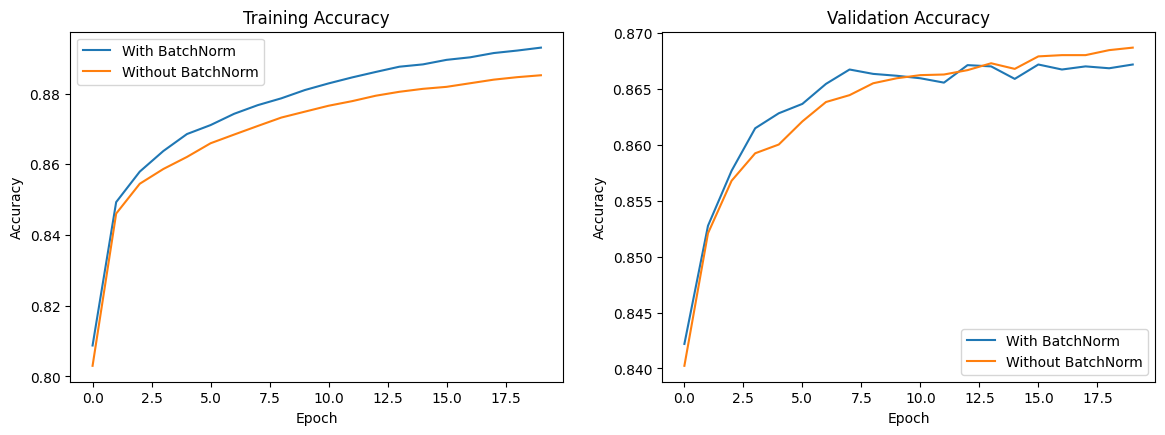

In [82]:
# Compare training dynamics
plt.figure(figsize=(14, 10))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(batchnorm_history.history['accuracy'], label='With BatchNorm')
plt.plot(nobatchnorm_history.history['accuracy'], label='Without BatchNorm')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(batchnorm_history.history['val_accuracy'], label='With BatchNorm')
plt.plot(nobatchnorm_history.history['val_accuracy'], label='Without BatchNorm')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Final Evaluation and Comparison

In [88]:
model_names = ['Baseline', 'Fixed Underfit', 'Simple', 'BatchNorm']
test_metrics = [baseline_test, fixed_underfit_test, simple_test, batchnorm_test]

# Create DataFrame for test metrics
comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [m[0] for m in test_metrics],
    'Precision': [m[1] for m in test_metrics],
    'Recall': [m[2] for m in test_metrics],
    'F1 Score': [m[3] for m in test_metrics]
})

In [89]:
comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.869730,0.862610,0.771213,0.814355
1,Fixed Underfit,0.869898,0.848245,0.790203,0.818196
2,Simple,0.866380,0.847136,0.780106,0.812240
3,BatchNorm,0.868390,0.842021,0.793670,0.817131


<Figure size 1200x600 with 0 Axes>

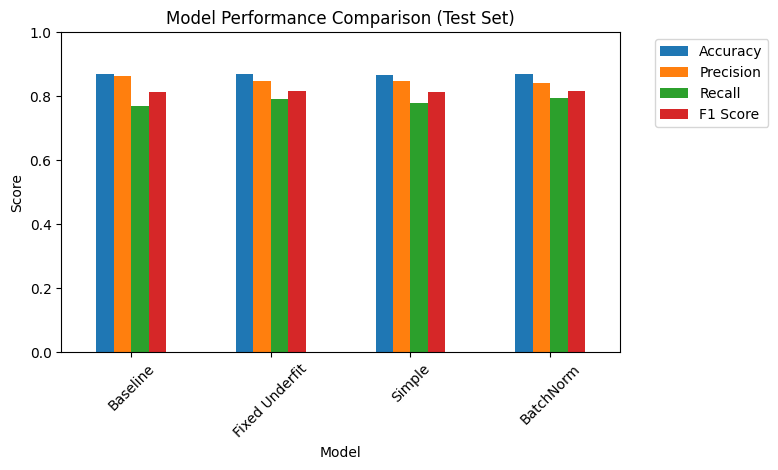

In [90]:
plt.figure(figsize=(12, 6))
comparison.set_index('Model').plot(kind='bar')
plt.title('Model Performance Comparison (Test Set)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()